# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import mlflow 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Importing Dataset

In [2]:
df = pd.read_csv('train_csv.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Preprocessing

In [3]:
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})
df['Married'] = df['Married'].map({'No' : 0, 'Yes' : 1})
df['Loan_Status'] = df['Loan_Status'].map({'N' : 0, 'Y' : 1})

In [4]:
df.dropna(inplace=True)

In [5]:
x = df[['Gender', 'Married', 'LoanAmount', 'ApplicantIncome', 'Credit_History']]
y = df['Loan_Status']

mlflow.set_experiment('5th Experiment')

mlflow.set_tag('mlflow.runName', 'abc malt')

mlflow.set_tag('My experiment', 'Haha')
mlflow.log_param('Paremeter :', x)

,Gender,Married,LoanAmount,ApplicantIncome,Credit_History
1,0.0,1.0,128.0,4583,1.0
2,0.0,1.0,66.0,3000,1.0
3,0.0,1.0,120.0,2583,1.0
4,0.0,0.0,141.0,6000,1.0
5,0.0,1.0,267.0,5417,1.0
...,...,...,...,...,...
609,1.0,0.0,71.0,2900,1.0
610,0.0,1.0,40.0,4106,1.0
611,0.0,1.0,253.0,8072,1.0
612,0.0,1.0,187.0,7583,1.0


In [6]:
x

,Gender,Married,LoanAmount,ApplicantIncome,Credit_History
1,0.0,1.0,128.0,4583,1.0
2,0.0,1.0,66.0,3000,1.0
3,0.0,1.0,120.0,2583,1.0
4,0.0,0.0,141.0,6000,1.0
5,0.0,1.0,267.0,5417,1.0
...,...,...,...,...,...
609,1.0,0.0,71.0,2900,1.0
610,0.0,1.0,40.0,4106,1.0
611,0.0,1.0,253.0,8072,1.0
612,0.0,1.0,187.0,7583,1.0


In [7]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

# Model Training

In [8]:
depth = 10

mlflow.log_param('max_depth :', depth)

model = RandomForestClassifier(max_depth=depth, random_state=0)
model.fit(x, y)

RandomForestClassifier(max_depth=10, random_state=0)

In [9]:
accu = accuracy_score(y_val, model.predict(x_val))
print(f'Accuracy for testing: {accu:.2f}')

mlflow.log_metric('Val_acc :', accu)

Accuracy for testing: 0.95


In [10]:
train_acc = accuracy_score(y_train, model.predict(x_train))
print(f'Accuracy for training: {train_acc:.2f}')

mlflow.log_metric('Train_acc :', train_acc)

Accuracy for training: 0.92


In [11]:
mlflow.end_run()

2025/04/30 17:24:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


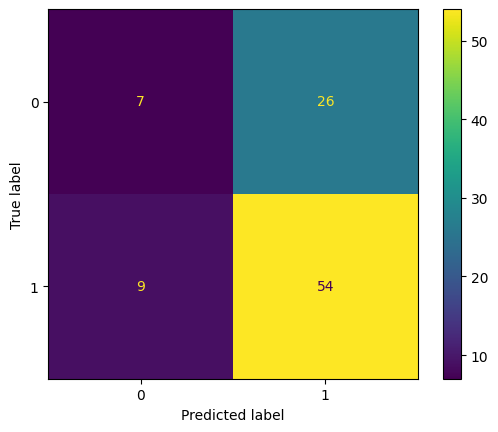

In [12]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


with mlflow.start_run():
    knn_model= KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(x_train, y_train)

    pred_val = knn_model.predict(x_val)
    val_acc=accuracy_score(y_val, pred_val)

    pred_train = knn_model.predict(x_train)
    train_acc=accuracy_score(y_train, pred_train)

    run="KNN"
    mlflow.set_tag('mlflow.runName',run)
    mlflow.log_param('neighbors',5)
    mlflow.log_metric('val_acc',val_acc)
    mlflow.log_metric('train_acc',train_acc)
    mlflow.set_tag('data file','data_new.csv')

    cm=ConfusionMatrixDisplay.from_predictions( y_val,pred_val)
    cm.figure_.savefig('confusion_mat.png')
    mlflow.log_artifact('confusion_mat.png')
    mlflow.sklearn.log_model(knn_model, "model")
